In [61]:
library(TESS)
library(TreeSim)
library(TreePar)
library(NELSI)
source('phylodynamics_adequacy/02-Ebola-Functions.R')

In [62]:
trees <- read.tree('phylodynamics_adequacy/02-EbolaTrees.trees')

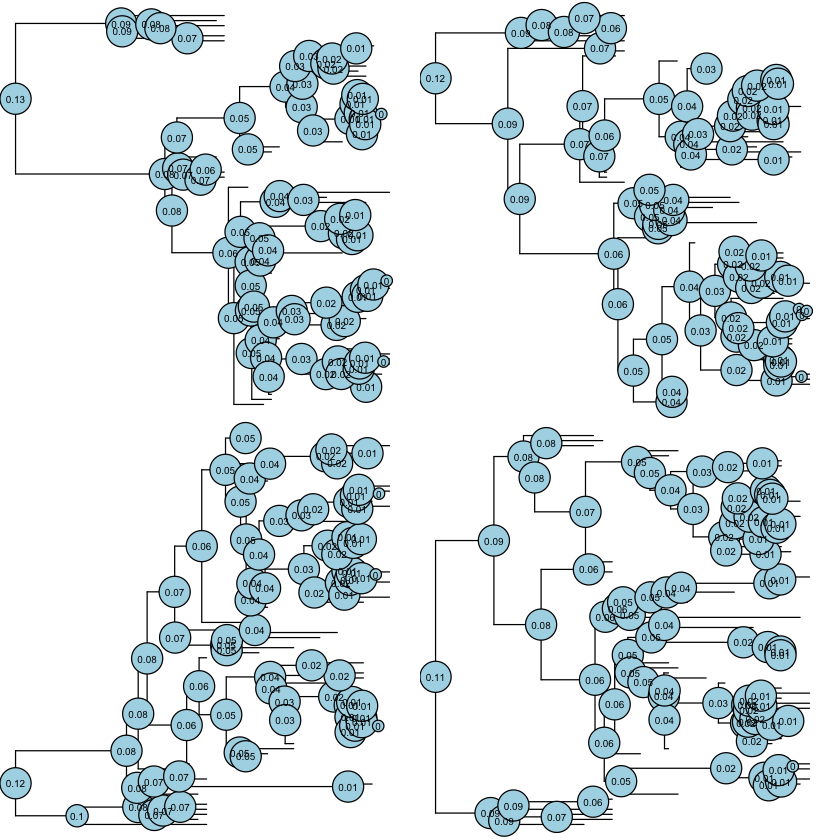

In [63]:
par(mfrow = c(2, 2))
plot(trees[[10]], show.tip.label = F, no.margin = T)
nodelabels(round(intnode.times(trees[[10]]), 2), frame = 'circle', cex = 0.6)
plot(trees[[20]], show.tip.label = F, no.margin = T)
nodelabels(round(intnode.times(trees[[20]]), 2), frame = 'circle', cex = 0.6)
plot(trees[[30]], show.tip.label = F, no.margin = T)
nodelabels(round(intnode.times(trees[[30]]), 2), frame = 'circle', cex = 0.6)
plot(trees[[40]], show.tip.label = F, no.margin = T)
nodelabels(round(intnode.times(trees[[40]]), 2), frame = 'circle', cex = 0.6)

## Skyline

In [127]:
#estimate death rate
deathfix <- 0
#fix sampling probability
sprobc <- 0.7
# 3 Re intervals
numbRe <- 1
#calculate likelihood for first 10 trees
numbTree <- 10

In [128]:
droptip<-c("EBOV|KM034550|EM095|SierraLeone_EM|2014-05-25",
           "EBOV|KM034554|G3676|SierraLeone_G|2014-05-27",
           "EBOV|KM034559|G3680|SierraLeone_G|2014-05-28",
           "EBOV|KM034563|G3687|SierraLeone_G|2014-05-28",
           "EBOV|KM034561|G3683|SierraLeone_G|2014-05-28",
           "EBOV|KM034562|G3686|SierraLeone_G|2014-05-28")

likdif <- vector()
estimates <- c()
for(index in 1:numbTree){
    test <- drop.tip(trees[[index]], droptip)
    node_times <- intnode.times(test)
    rootheight <- max(node_times)
    x <- getx(test, sersampling = 1)
    times <- x[, 1]
    ttype <- x[, 2]
    if(numbRe == 1){
        out <- optim(c(2,1,0.7), LikShiftsSTTebolaConst, times = times, ttype = ttype, 
                    sprobc = sprobc, deathfix = deathfix, cutoff = 0)
    }else{
        out <- optim(c(rep(2, numbRe), 1, 0.7), LikShiftsSTTebola, times = times, 
                     ttype = ttype, sprobc=sprobc, deathfix=deathfix, cutoff=0)
    }
    estimates <- rbind(estimates, parepi(out, sprobc = sprobc, deathfix = deathfix))
}

In [129]:
#LikShiftsSTTebolaConst
#parepi

In [134]:
estimatesraw <- estimates
estimatesmedian <- vector()
estimatesHPD <- vector()
estimatesmean <- vector()
estimatesvar <- vector()
for (i in 1:length(estimates[1,])){
    estimatesmedian<-c(estimatesmedian,median(estimates[,i]))
    estimatesHPD<-cbind(estimatesHPD,HPD(estimates[,i]))
    estimatesmean<-c(estimatesmean,mean(estimates[,i]))
    estimatesvar<-c(estimatesvar,var(estimates[,i]))
}
estimates<-round(rbind(estimatesmedian,estimatesHPD,estimatesmean,estimatesvar,estimatesraw),2)
#colnames(estimates)<-c("R1","R2","R3","rateUninf","sampProb")
#rownames(estimates)<-c("median","95low","95up","mean","var",1:numbTree)
print(estimates)

                [,1] [,2] [,3]
estimatesmedian 1.28 4.19 0.70
estimatesvar    0.12 1.70 0.03
2               1.60 6.29 0.70
estimatesmean   1.11 4.02 0.59
estimatesvar    0.22 2.12 0.06
estimatesmedian 1.29 4.19 0.70
estimatesvar    0.12 1.70 0.03
2               1.60 6.29 0.70
estimatesmean   1.17 4.12 0.63
estimatesvar    0.16 1.86 0.04
estimatesmedian 1.30 4.19 0.70
95low           1.13 3.12 0.70
2               1.60 6.29 0.70
estimatesmean   1.21 4.19 0.65
estimatesvar    0.12 1.70 0.03
median          1.30 4.19 0.70
95low           1.13 3.12 0.70
95up            1.38 5.82 0.70
mean            1.30 4.42 0.70
var             0.02 1.06 0.00
1               1.19 3.53 0.70
2               1.60 6.29 0.70
3               1.15 3.12 0.70
4               1.37 5.82 0.70
5               1.38 3.56 0.70
6               1.13 4.03 0.70
7               1.28 4.59 0.70
8               1.31 4.35 0.70
9               1.22 5.05 0.70
10              1.34 3.89 0.70


In [131]:
out

ERROR: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[5]]) result is length 0


$par
[1] 126.02646  93.87571 -25.35564

$value
[1] -524.2807

$counts
function gradient 
     136       NA 

$convergence
[1] 0

$message
NULL


In [117]:
out
parepi(out, sprobc = sprobc, deathfix = deathfix)

ERROR: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[5]]) result is length 0


$par
[1]  133.53268  105.98030  110.78325   97.49522 -189.01657

$value
[1] -524.2841

$counts
function gradient 
     502       NA 

$convergence
[1] 1

$message
NULL


[1] 1.369633 1.087031 1.136294 3.743773 0.700000

In [118]:
par_ <- out$par

In [125]:
	temp<-out$par
temp
	par<-vector()
	sampling<-temp[length(temp)]
	if (sprobc>0) {sampling<-sprobc}
	temp<-temp[-length(temp)]
temp
	death<-temp[length(temp)]
	if (deathfix>0) {death<-deathfix}
	par<-temp[-length(temp)]/death
par
	par<-c(par,1/death*365,sampling)
	par

[1]  133.53268  105.98030  110.78325   97.49522 -189.01657

[1] 133.53268 105.98030 110.78325  97.49522

[1] 1.369633 1.087031 1.136294

[1] 1.369633 1.087031 1.136294 3.743773 0.700000

In [120]:
sampling

[1] 0.7

In [121]:
death

[1] 97.49522

In [122]:
temp

[1] 133.53268 105.98030 110.78325  97.49522

In [123]:
out$par

[1]  133.53268  105.98030  110.78325   97.49522 -189.01657

In [ ]:
# EI